In [1]:
import requests   # Importing requests to extract content from a url
from bs4 import BeautifulSoup as bs # Beautifulsoup is for web scrapping...used to scrap specific content
import re
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
# Upload the CSV file to Google Colab
from google.colab import files
uploaded = files.upload()

Saving Elon_musk (1).csv to Elon_musk (1).csv


In [18]:
# Upload the CSV file to Google Colab
from google.colab import files
uploaded = files.upload()

Saving positive-words.txt to positive-words.txt


In [19]:
# Upload the CSV file to Google Colab
from google.colab import files
uploaded = files.upload()

Saving negative-words.txt to negative-words.txt


In [20]:
# Upload the CSV file to Google Colab
from google.colab import files
uploaded = files.upload()

Saving stop.txt to stop.txt


In [8]:
# creating empty reviews list
iphone14_reviews=[]

# Extracting reviews from Amazon website
for i in range(1,20):
  ip=[]

url = 'https://www.amazon.in/Apple-iPhone-Pro-Max-128GB/product-reviews/B0BDJH6GL8'
response = requests.get(url)
soup = bs(response.content,"html.parser")# creating soup object to iterate over the extracted content
reviews = soup.findAll("span",attrs={"class","a-size-base review-text review-text-content"})
for i in range(len(reviews)):
    ip.append(reviews[i].text)
    iphone14_reviews=iphone14_reviews+ip

# writng reviews in a text file
with open("iphone14.txt","w",encoding='utf8') as output:
    output.write(str(iphone14_reviews))

In [9]:
iphone14_reviews

["\nHere is my review of the iPhone 14 Pro Max after using it for a couple of weeks:The iPhone 14 Pro Max is the most advanced and powerful smartphone that Apple has made. It offers a stunning design, a superb display, a pro-level camera system, and a blazing-fast performance. It is not a cheap device, but it is worth every penny if you are looking for the best of the best.Design: The iPhone 14 Pro Max has a sleek and elegant design that feels premium in the hand. It has a flat 6.7-inch OLED display that covers almost the entire front of the device, with a pill-shaped notch at the top that houses the Face ID sensors and the selfie camera. The back of the device is made of textured matt glass that resists fingerprints and scratches, and the frame is made of stainless steel that adds durability and shine. The device comes in four beautiful colors: Space Black, Silver, Gold, and Deep Purple. The iPhone 14 Pro Max also has an IP68 rating, which means it can withstand water up to 6 meters d

In [10]:
 # Joinining all the reviews
ip_rev_string = " ".join(iphone14_reviews)


In [11]:
# Removing unwanted symbols
ip_rev_string = re.sub("[^A-Za-z" "]+"," ",ip_rev_string).lower()
ip_rev_string = re.sub("[0-9" "]+"," ",ip_rev_string)

In [12]:
# words that contained in iphone 7 reviews
ip_reviews_words = ip_rev_string.split(" ")
print(ip_reviews_words)

['', 'here', 'is', 'my', 'review', 'of', 'the', 'iphone', 'pro', 'max', 'after', 'using', 'it', 'for', 'a', 'couple', 'of', 'weeks', 'the', 'iphone', 'pro', 'max', 'is', 'the', 'most', 'advanced', 'and', 'powerful', 'smartphone', 'that', 'apple', 'has', 'made', 'it', 'offers', 'a', 'stunning', 'design', 'a', 'superb', 'display', 'a', 'pro', 'level', 'camera', 'system', 'and', 'a', 'blazing', 'fast', 'performance', 'it', 'is', 'not', 'a', 'cheap', 'device', 'but', 'it', 'is', 'worth', 'every', 'penny', 'if', 'you', 'are', 'looking', 'for', 'the', 'best', 'of', 'the', 'best', 'design', 'the', 'iphone', 'pro', 'max', 'has', 'a', 'sleek', 'and', 'elegant', 'design', 'that', 'feels', 'premium', 'in', 'the', 'hand', 'it', 'has', 'a', 'flat', 'inch', 'oled', 'display', 'that', 'covers', 'almost', 'the', 'entire', 'front', 'of', 'the', 'device', 'with', 'a', 'pill', 'shaped', 'notch', 'at', 'the', 'top', 'that', 'houses', 'the', 'face', 'id', 'sensors', 'and', 'the', 'selfie', 'camera', 'the',

!python -m spacy download en_core_web_md if package is not installed

In [29]:
with open("stop.txt","r") as sw:
    stopwords = sw.read()

stopwords = stopwords.split("\n")

ip_reviews_words = [w for w in ip_reviews_words if not w in stopwords]

In [30]:
# Joinining all the reviews into single paragraph
ip_rev_para = " ".join(ip_reviews_words)

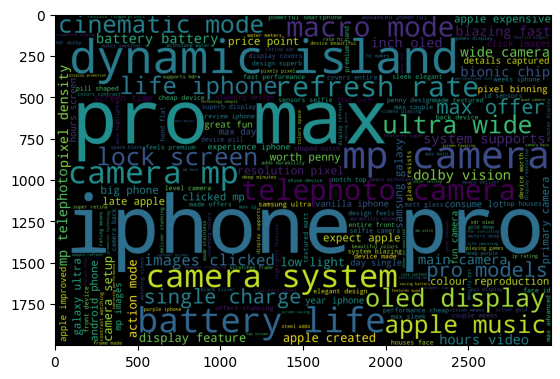

In [31]:
wordcloud_ip = WordCloud(
                      background_color='black',
    width=3000,height=2000
                     ).generate(ip_rev_para)

plt.imshow(wordcloud_ip)

In [23]:
# positive words # Choose the path for +ve words stored in system
with open("positive-words.txt","r") as pos:
  poswords = pos.read().split("\n")


In [24]:
# Choosing the only words which are present in positive words
ip_pos = " ".join ([w for w in ip_reviews_words if w in poswords])

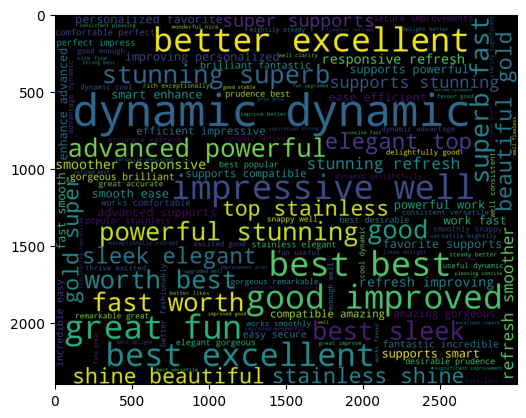

In [25]:

# Positive word cloud
wordcloud_pos = WordCloud(
                      background_color='black',
                      width=3000,
                      height=2400
                     ).generate(ip_pos)

plt.imshow(wordcloud_pos)

In [26]:
# negative words  Choose path for -ve words stored in system
with open("negative-words.txt","r", encoding="ISO-8859-1") as neg:
  negwords = neg.read().split("\n")

In [27]:
# Choosing the only words which are present in negwords
ip_neg = " ".join ([w for w in ip_reviews_words if w in negwords])



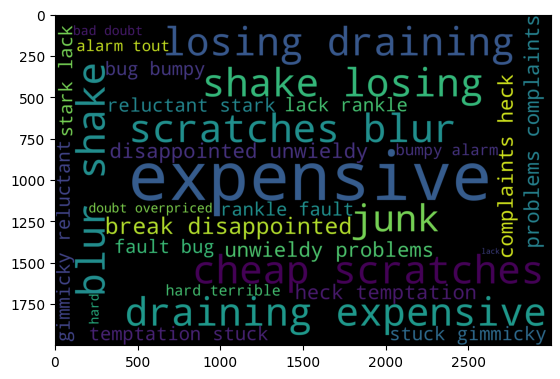

In [28]:
# negative word cloud
wordcloud_neg = WordCloud(
                      background_color='black',
                      width=3000,
                      height=2000
                     ).generate(ip_neg)

plt.imshow(wordcloud_neg)